<a href="https://colab.research.google.com/github/matheusapostulo/404TRAINER/blob/main/semana6_compvisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semana 6: Online - Teoria (entrega até 26/09/2023 23:59)
Atividade em grupo de até 3 pessoas.

Faça uma pesquisa sobre como é possível:

1. Realizar a limiarização de uma imagem usando Python e scikit-image.
2. Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.
3. Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.
4. Equalizar o histograma de uma imagem usando Python e scikit-image.
5. Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.
6. Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.

Para cada item acima, inclua um exemplo de código que exemplifica cada tarefa e uma imagem resultante do código (por exemplo, no item 2, a imagem deve conter a imagem em tons de cinza e o histograma da imagem).

Não se esqueça de incluir as referências na pesquisa.

Publique o resultado dessa atividade no seu blog.

Nesse link de tarefa do Moodle, envie um arquivo txt contendo o link do seu blog referente ao texto dessa atividade.

In [ ]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):
  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)

  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))

  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()

'''
Referência:
https://acervolima.com/segmentacao-de-imagens-usando-o-modulo-scikit-image-do-python/
'''

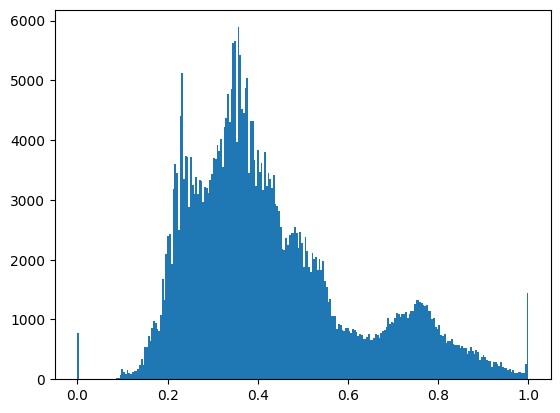

'\nReferência:\nhttps://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935\nhttps://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5\n'

In [20]:
# 2. Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.
# create the histogram
from skimage import io
import matplotlib.pyplot as plt

imagem = io.imread('kodim23.png', as_gray=True)
ax = plt.hist(imagem.ravel(), bins = 256)
plt.show()

'''
Referência:
https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935
https://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5
'''

'\nReferência:\nhttps://danielmuellerkomorowska.com/2020/06/17/analyzing-image-histograms-with-scikit-image/\nhttps://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html\n'

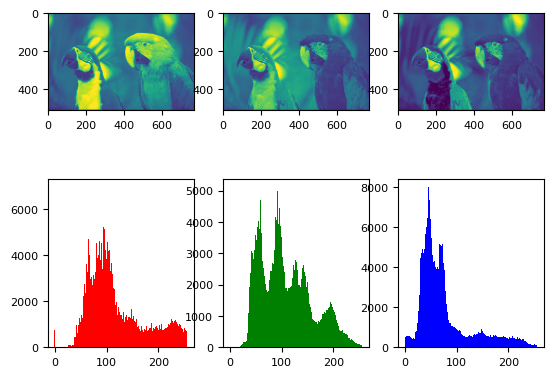

In [42]:
# 3. Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

imagem_3 = io.imread('kodim23.png')

imagem_red, imagem_green, imagem_blue = imagem_3[:,:,0], imagem_3[:,:,1], imagem_3[:,:,2]

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(imagem_red)
ax[0,1].imshow(imagem_green)
ax[0,2].imshow(imagem_blue)


bins = np.arange(-0.5, 255+1,1)
ax[1,0].hist(imagem_red.flatten(), bins = bins, color='r')
ax[1,1].hist(imagem_green.flatten(), bins=bins, color='g')
ax[1,2].hist(imagem_blue.flatten(), bins=bins, color='b')

'''
Referência:
https://danielmuellerkomorowska.com/2020/06/17/analyzing-image-histograms-with-scikit-image/
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html
'''

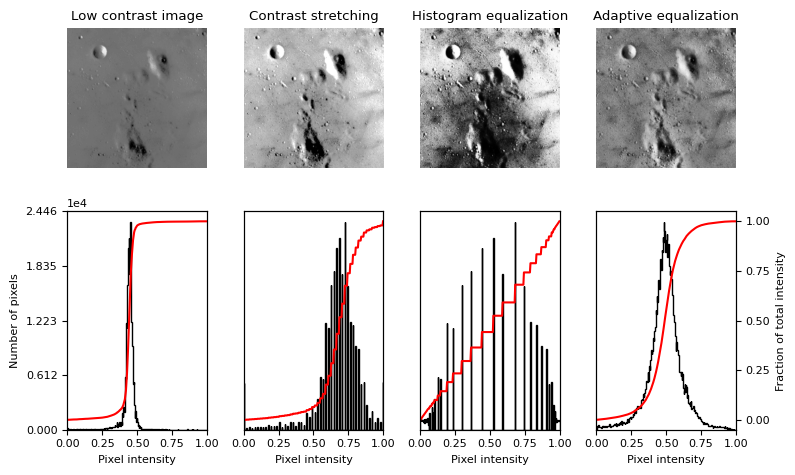

'\nhttps://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html\nhttps://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5\n'

In [41]:
# 4. Equalizar o histograma de uma imagem usando Python e scikit-image.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

'''
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html
https://www.nicolaromano.net/data-thoughts/scikit-image-pt-1/#ib-toc-anchor-5
'''

In [ ]:
# 5. Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.


REFATORAR FUNÇÃO ABAIXO POIS ESTÁ ANALISANDO IMAGEM E NÃO HISTOGRAMA
https://scikit-image.org/docs/stable/api/skimage.html

In [ ]:
# 6 . Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.
import cv2
from skimage.color import rgb2gray
from skimage.exposure import is_low_contrast

def analisaImagem(imagem):
  # Configurar as propriedades do texto
  texto_low = "Low contrast image"
  texto_high = "High contrast image"
  posicao = (5, 25)
  fonte = {'family': 'serif', 'color':  'white', 'size': 14}
  fundo = {'color': 'black'}

  if(is_low_contrast(imagem,0.35)):
    # Adicionar o texto com a fonte e o fundo especificados
    plt.text(*posicao, texto_low, fontdict=fonte, bbox=fundo)
  else:
    # Adicionar o texto com a fonte e o fundo especificados
    plt.text(*posicao, texto_high, fontdict=fonte, bbox=fundo)


# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Carregando uma imagem de baixo contraste
img_baixo_contraste = io.imread('img_baixo_contraste.png')

# Vamos testar a função com as imagens em células abaixo!!!!!!

'''
https://www.geeksforgeeks.org/detecting-low-contrast-images-with-opencv-scikit-image-and-python/
https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.is_low_contrast
'''

In [91]:
histograma, intensidades = exposure.histogram(gray_coffee)
baixo_contraste = exposure.is_low_contrast(histograma)

print(baixo_contraste)

True


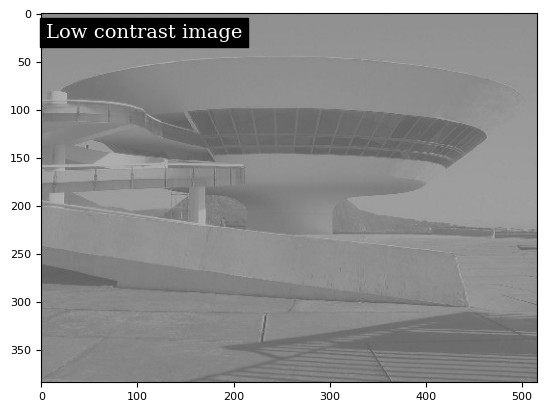

In [87]:
analisaImagem(img_baixo_contraste)

plt.imshow(img_baixo_contraste, cmap='gray')
plt.show()

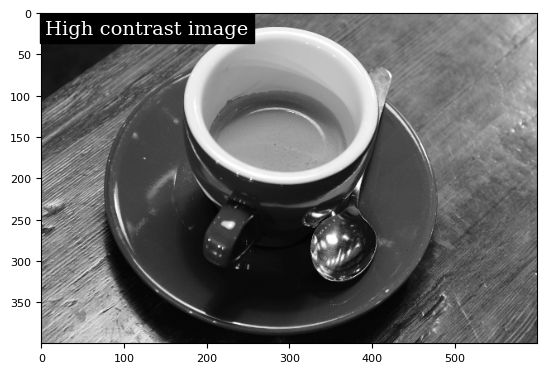

In [88]:
analisaImagem(gray_coffee)

plt.imshow(gray_coffee, cmap='gray')
plt.show()